In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### step-size, static


In [ ]:
# solver: order 1, euler
euler_step = lambda t,y,h,ydot: y + h*ydot(t,y)

# solver: order 2, trapezoid
def trap_step(t,y,h,ydot):
  s1 = ydot(t,y)
  s2 = ydot(t+h,y+h*s1)
  rc = y+h/2*(s1+s2)
  return rc

# solver: order 4, rk4
def rk4_step(t,y,h,ydot):
  s1 = ydot(t,y)
  s2 = ydot(t+h/2,y+h/2*s1)
  s3 = ydot(t+h/2,y+h/2*s2)
  s4 = ydot(t+h,y+h*s3)
  rc = y + h/6*(s1+2*s2+2*s3+s4)
  return rc


In [ ]:
# eg 18 usw : ivp, solution

# ivp: f(t,y)
ydot = lambda t,y: t*y + pow(t,3)

# ivp: ic,t
ic = 1.
t = [0.,1.]

# solution, for error
y = lambda t: z
y2 = y(t[1]) # true value at interval end point




y, actual = 1.9461638121003846



,n,h,rk4,err
0,5.0,0.200000,1.946140,2.378807e-05
1,10.0,0.100000,1.946162,1.465466e-06
2,20.0,0.050000,1.946164,9.035429e-08
3,40.0,0.025000,1.946164,5.598288e-09
4,80.0,0.012500,1.946164,3.481990e-10
5,160.0,0.006250,1.946164,2.170952e-11
6,320.0,0.003125,1.946164,1.349587e-12
7,640.0,0.001563,1.946164,7.260859e-14


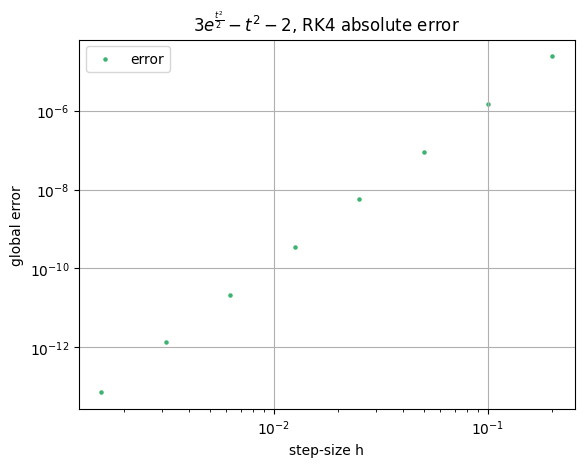

In [ ]:
# eg 18 : RK4 error per step-size

# n partitions of step-size h
n = 5
h = (t[1]-t[0])/n

# output = error per step size
kmax = 8

for k in range(kmax):
  # reset per k: n,h
  if k > 0:
    n *= 2
    h = (t[1] - t[0])/n

  # reset per k: ic
  t1 = t2 = t[0]
  w1 = ic

  # calc
  for i in range(n):
    t2 += h
    w2 = rk4_step(t1,w1,h,ydot)
    t1 = t2
    w1 = w2

  # group output to declutter for n00bs
  if k == 0:
    ds = np.zeros((kmax,4)) # n,h,rk4,err
  ds[k,0] = n
  ds[k,1] = h
  ds[k,2] = w1
  ds[k,3] = abs(y2-w1)

# dataframe from datastore
print(f"\n\ny, actual = {y2}\n") # bc pf.style.set_caption() bites in colab atm
df = pd.DataFrame(data=ds,columns=["n","h","rk4","err"])
if True: # spreadsheet
  display(df)

if True: # plot
  ax1 = df.plot(x = "h",y="err",label="error",color="mediumseagreen",marker=".",kind="scatter")
  ax1.set_title("$3e^{\\frac{t^2}{2}} - t^2 - 2$, RK4 absolute error")
  ax1.set_xlabel("step-size h")
  ax1.set_ylabel("global error")
  ax1.loglog()
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')
  plt.show()


### step-size, variable


In [ ]:
# solver: RK45, dormand-prince
def rk45_step_dp(t,y,h,ydot):
  s1 = ydot(t,y)
  s2 = ydot(t+h/5,y+h/5*s1)
  s3 = ydot(t+h*3/10,y+h*3/40*s1+h*9/40*s2)
  s4 = ydot(t+h*4/5,y+h*44/45*s1-h*56/15*s2+h*32/9*s3)
  s5 = ydot(t+h*8/9,y+h*(19372/6561*s1-25360/2187*s2+64448/6561*s3-212/729*s4))
  s6 = ydot(t+h,y+h*(9017/3168*s1-355/33*s2+46732/5247*s3+49/176*s4-5103/18656*s5))
  z = y+h*(35/384*s1+500/1113*s3+125/192*s4-2187/6784*s5+11/84*s6)
  s7 = ydot(t+h,z)
  #w = y+h*(5179/57600*s1+7571/16695*s3+393/640*s4-92097/339200*s5+187/2100*s6+1/47*s7) # FSAL not needed!
  #e = abs(z-w)
  e = h*abs(71/57600*s1-71/16695*s3+71/1920*s4-17253/339200*s5+22/525*s6-1/40*s7)
  return z,e




y, actual = 1.9461638121003846



,n,h,rk4,err
0,5.0,0.200000,1.946140,2.378807e-05
1,10.0,0.100000,1.946162,1.465466e-06
2,20.0,0.050000,1.946164,9.035429e-08
3,40.0,0.025000,1.946164,5.598288e-09
4,80.0,0.012500,1.946164,3.481990e-10
5,160.0,0.006250,1.946164,2.170952e-11
6,320.0,0.003125,1.946164,1.349587e-12
7,640.0,0.001563,1.946164,7.260859e-14


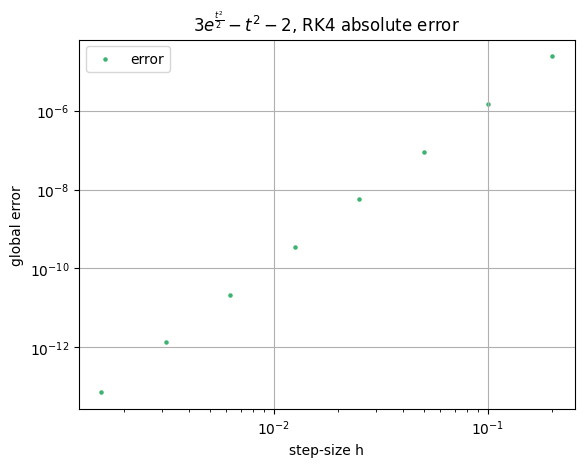

In [ ]:
# eg 22 : RK45, dormand-prince

# tolerance, relative
trel = 1e-4

# ic
t1 = t2 = t[0]
w1 = ic

# h, initia;
h = pow(trel,1/5)

z,erel = rk45_step_dp(t,w1,h,ydot)
while erel > trel:
  h = pow(erel,1/5)
  z,erel = rk45_step_dp(t,w1,h,ydot)
  w1 = z1

# group output to declutter for n00bs
ds = np.zeros((kmax,5)) # i,ti,wi,yi,ei
#ds[i,0] = i
#ds[i,1] = t1
#ds[i,2] = w1
#ds[i,3] = y1
#ds[i,4] = abs(y2-w1)

# dataframe from datastore
print(f"\n\ny, actual = {y2}\n") # bc pf.style.set_caption() bites in colab atm
df = pd.DataFrame(data=ds,columns=["i","ti","wi","yi","ei"])
if True: # spreadsheet
  display(df)

if False: # plot
  ax1 = df.plot(x = "ti",y="yi",label="$y_{actual}$",color="0.3")
  ax1 = df.plot(x = "ti",y="wi",label="$t_{rel}=0.0001$",color="mediumseagreen",marker=".",kind="scatter")
  ax1.set_title("$3e^{\\frac{t^2}{2}} - t^2 - 2$, RK45 per $T_{rel}$")
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")
  ax1.loglog()
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')
  plt.show()
